In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
%matplotlib inline

### Copy the data from website to .txt and read

![](docs/ColombiaData.png)

In [ ]:
file_path = "test.txt"
df = pd.read_csv(file_path, sep="\t")

In [ ]:
df.head()

,Fecha,Densidades,Hombres,Mujeres,Población
0,2021,45,25.171.408,26.094.433,51.049.000
1,2020,44,24.984.564,25.898.320,50.372.000
2,2019,43,24.713.193,25.626.250,49.396.000
3,2018,42,24.370.780,25.290.276,48.258.000
4,2017,42,23.990.081,24.919.763,47.419.000


### Convert to efficient compression format

In [ ]:
df.to_pickle("test.pkl", compression="gzip")

### Read the data

In [ ]:
df = pd.read_pickle("test.pkl", compression="gzip")

In [ ]:
# replace . from hombres number
df["Hombres"] = df["Hombres"].str.replace(".", "").astype(int)
df["Mujeres"] = df["Mujeres"].str.replace(".", "").astype(int)
df["Población"] = df["Población"].str.replace(".", "").astype(int)

/var/folders/xd/jh3d4d1d1rd5jck45lvbs1900000gp/T/ipykernel_4380/1448408230.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df["Hombres"] = df["Hombres"].str.replace(".", "").astype(int)
/var/folders/xd/jh3d4d1d1rd5jck45lvbs1900000gp/T/ipykernel_4380/1448408230.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df["Mujeres"] = df["Mujeres"].str.replace(".", "").astype(int)
/var/folders/xd/jh3d4d1d1rd5jck45lvbs1900000gp/T/ipykernel_4380/1448408230.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df["Población"] = d

In [ ]:
df.head()

,Fecha,Densidades,Hombres,Mujeres,Población
0,2021,45,25171408,26094433,51049000
1,2020,44,24984564,25898320,50372000
2,2019,43,24713193,25626250,49396000
3,2018,42,24370780,25290276,48258000
4,2017,42,23990081,24919763,47419000


### see data

<Axes: title={'center': 'Población de Colombia'}, xlabel='Año', ylabel='Población'>

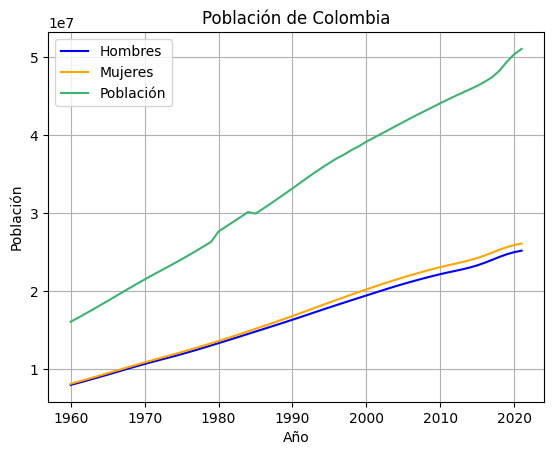

In [ ]:

df.plot(
    x = "Fecha", 
    y = ["Hombres", "Mujeres", "Población"], 
    grid = True,
    title = "Población de Colombia",
    backend="matplotlib",
    xlabel="Año",
    ylabel="Población",
    color=["blue", "orange", "mediumseagreen"],
)

In [ ]:
new_dates = np.arange(2021, 2046)

In [ ]:
hombres = df["Hombres"].to_numpy()
mujeres = df["Mujeres"].to_numpy()
population = df["Población"].to_numpy()
years = df["Fecha"].to_numpy()

In [ ]:
years

array([2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011,
       2010, 2009, 2008, 2007, 2006, 2005, 2004, 2003, 2002, 2001, 2000,
       1999, 1998, 1997, 1996, 1995, 1994, 1993, 1992, 1991, 1990, 1989,
       1988, 1987, 1986, 1985, 1984, 1983, 1982, 1981, 1980, 1979, 1978,
       1977, 1976, 1975, 1974, 1973, 1972, 1971, 1970, 1969, 1968, 1967,
       1966, 1965, 1964, 1963, 1962, 1961, 1960])

## Lineal growth method

Explain: 

Assume that population growth is going to be data by a linear rate

![](https://ccp.ucr.ac.cr/cursos/demografia_03/Imagenes/quinta4.gif){ width="800" height="600" style="display: block; margin: 0 auto" }

where r is the slope

$$ r = \frac{P_{last} - P_{init}}{t_{last}-t_{init} }$$


> Note that r is the growth speed factor.

In [ ]:
r_hombres_lineal = (hombres[-1] - hombres[0] ) / ( years[-1] - years[0])
r_mujeres_lineal = (mujeres[-1] - mujeres[0] ) / ( years[-1] - years[0])
r_lineal_lineal = (population[-1] - population[0] ) / ( years[-1] - years[0])

In [ ]:
new_hombres = hombres[0] + (r_hombres_lineal) * (new_dates - years[0]) 
new_mujeres = mujeres[0] + (r_mujeres_lineal) * (new_dates - years[0])
new_population = population[0] + (r_lineal_lineal) * (new_dates - years[0])

## Geometric gradient - exponential method

$$ \frac{2}{3} $$

Explain:


![](https://ccp.ucr.ac.cr/cursos/demografia_03/Imagenes/quinta12.gif)


Asume that

$$ P_{future} = P_{initial} * (1 + r )^k$$

> where r is the slope and k is the difference between final and initial period

In [ ]:
r_hombres_exponencial = (hombres[-1] / hombres[0]) ** (1 / (years[-1] - years[0])) - 1
r_mujeres_exponencial = (mujeres[-1] / mujeres[0]) ** (1 / (years[-1] - years[0])) - 1
r_lineal_exponencial = (population[-1] / population[0]) ** (1 / (years[-1] - years[0])) - 1

In [ ]:
r_lineal_exponencial

0.01914149362834605

In [ ]:
new_hombres_exponencial = hombres[0] * ((r_hombres_exponencial + 1) ** (new_dates - years[0]))
new_mujeres_exponencial = mujeres[0] * ((r_mujeres_exponencial + 1) ** (new_dates - years[0]))
new_population_exponencial = population[0] * ((r_lineal_exponencial + 1) ** (new_dates - years[0]))

## To do

In [ ]:
def modelo_logistic(t, k, N_0, r):
    return k / (1 + (k/N_0 - 1) * np.exp(-r * t))

popt_hombres, pcov_hombres = curve_fit(modelo_logistic, years[::-5], hombres[::-5], maxfev=10000, bounds=([0, 0, 0], [np.inf, np.inf, np.inf]))

popt_mujeres, pcov_mujeres = curve_fit(modelo_logistic, years[::-5], mujeres[::-5], maxfev=10000, bounds=([0, 0, 0], [np.inf, np.inf, np.inf]))

popt_population, pcov_population = curve_fit(modelo_logistic, years[::-5], population[::-5], maxfev=10000, bounds=([0, 0, 0], [np.inf, np.inf, np.inf]))

np.polyfit(df["Fecha"], hombres, 1)
np.polyval(r_hombres_lineal, new_dates)

## Plot

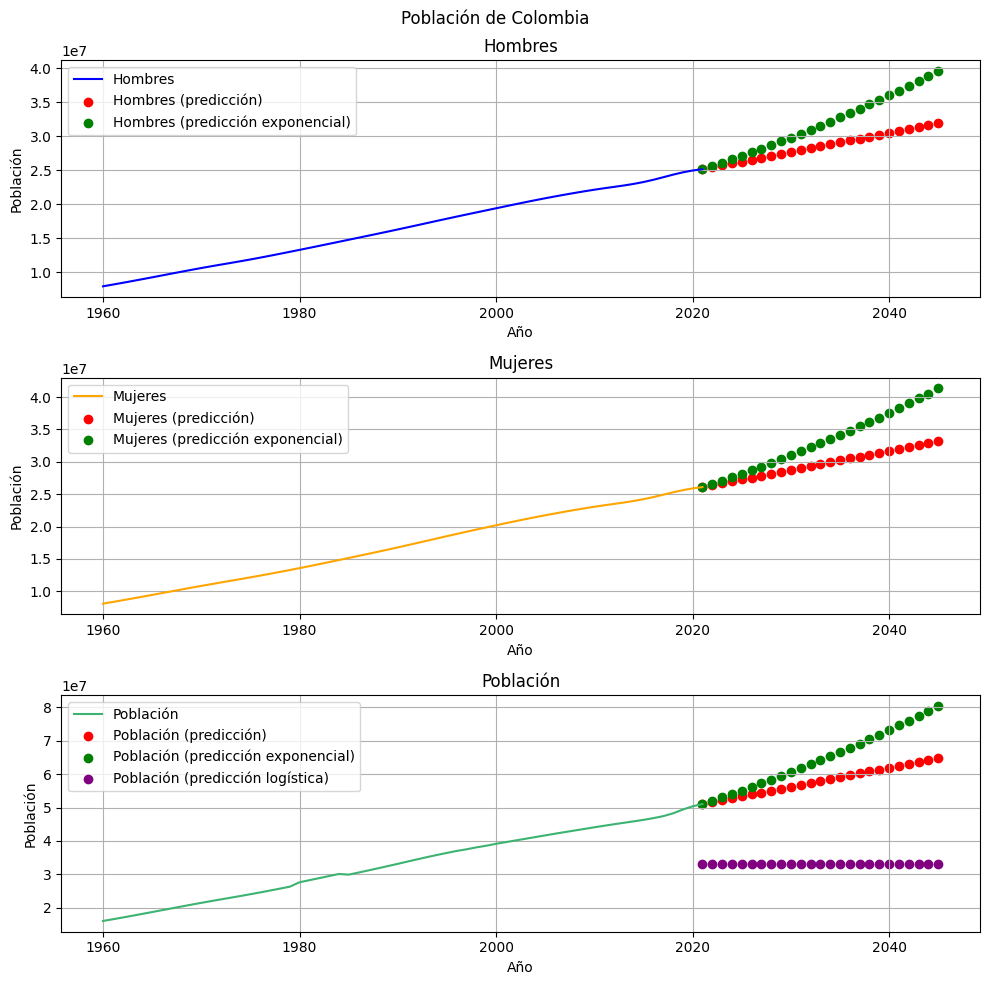

In [ ]:
fig, ax = plt.subplots(3, 1, figsize=(10, 10))

fig.suptitle("Población de Colombia")
ax[0].plot(years, hombres, label="Hombres", color="blue")
ax[0].scatter(new_dates, new_hombres, label="Hombres (predicción)", color="red")
ax[0].scatter(new_dates, new_hombres_exponencial, label="Hombres (predicción exponencial)", color="green")
ax[0].set_title("Hombres")
ax[0].set_xlabel("Año")
ax[0].set_ylabel("Población")
ax[0].grid(True)
ax[0].legend()

ax[1].plot(years, mujeres, label="Mujeres", color = "orange")
ax[1].scatter(new_dates, new_mujeres, label="Mujeres (predicción)", color = "red")
ax[1].scatter(new_dates, new_mujeres_exponencial, label="Mujeres (predicción exponencial)", color = "green")
ax[1].set_title("Mujeres")
ax[1].set_xlabel("Año")
ax[1].set_ylabel("Población")
ax[1].grid(True)
ax[1].legend()

ax[2].plot(years, population, label="Población", color="mediumseagreen")
ax[2].scatter(new_dates, new_population, label="Población (predicción)", color="red")
ax[2].scatter(new_dates, new_population_exponencial, label="Población (predicción exponencial)", color="green")
ax[2].set_title("Población")
ax[2].set_xlabel("Año")
ax[2].set_ylabel("Población")
ax[2].grid(True)
ax[2].legend()

fig.tight_layout()
plt.show()
